# **Covid19 Data Analysis**


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print('Modules are imported.')

Modules are imported.


Importing covid19 dataset



In [2]:
corona_dataset_csv = pd.read_csv('/content/covid19_Confirmed_dataset.csv')
corona_dataset_csv.head(10)
#We will notice data is from 22 January 2020 to 30 April 2020

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


#### Let's check the shape of the dataframe

In [3]:
corona_dataset_csv.shape    #Tuple with 266 rows and 104 columns

(266, 104)

In [4]:
columns = corona_dataset_csv.columns
columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20',
       '4/27/20', '4/28/20', '4/29/20', '4/30/20'],
      dtype='object', length=104)

Delete the useless columns


In [5]:
#Latitude and Longitude are not important features for us here
corona_dataset_csv.drop(["Lat",
                        "Long"],
                        axis=1,
                        #default value, annotation axis=0 which is equal to rows
                        inplace = True   #will change the corona dataset too
                        )

In [6]:
corona_dataset_csv.head(10)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


Aggregating the rows by the country

In [8]:
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()

In [9]:
corona_dataset_aggregated.head()
#After aggregation, the index of the df is the column at which we aggregated

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [10]:
corona_dataset_aggregated.shape
#we have 187 countries, 100 dates

(187, 101)

Visualizing data related to a country for example China


In [13]:
corona_dataset_aggregated.loc["China"]
#will return pandas series

,China
Province/State,AnhuiBeijingChongqingFujianGansuGuangdongGuang...
1/22/20,548
1/23/20,643
1/24/20,920
1/25/20,1406
...,...
4/26/20,83912
4/27/20,83918
4/28/20,83940
4/29/20,83944


Calculating a good measure


In [20]:
print(corona_dataset_aggregated.loc['China'])


Province/State    AnhuiBeijingChongqingFujianGansuGuangdongGuang...
1/22/20                                                         548
1/23/20                                                         643
1/24/20                                                         920
1/25/20                                                        1406
                                        ...                        
4/26/20                                                       83912
4/27/20                                                       83918
4/28/20                                                       83940
4/29/20                                                       83944
4/30/20                                                       83956
Name: China, Length: 101, dtype: object


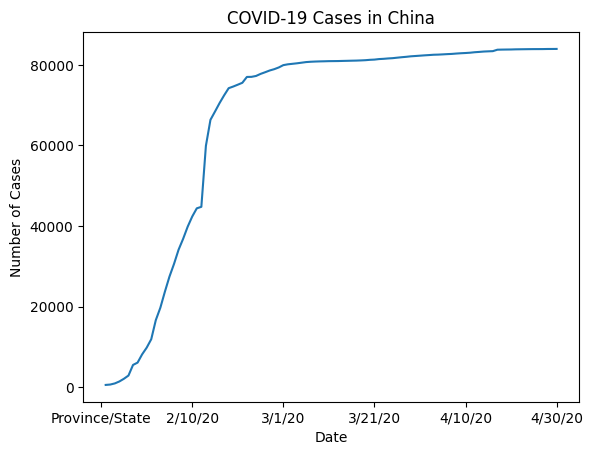

In [23]:
# Convert the columns to numeric before plotting
corona_dataset_aggregated = corona_dataset_aggregated.apply(pd.to_numeric, errors='coerce')

corona_dataset_aggregated.loc['China'].plot()
plt.title('COVID-19 Cases in China')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.show()

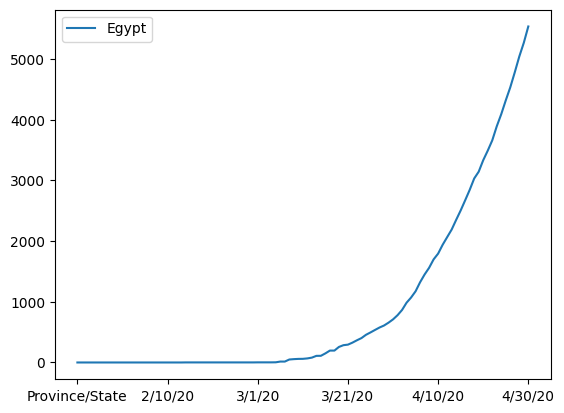

In [25]:
corona_dataset_aggregated.loc['Egypt'].plot()
plt.legend()

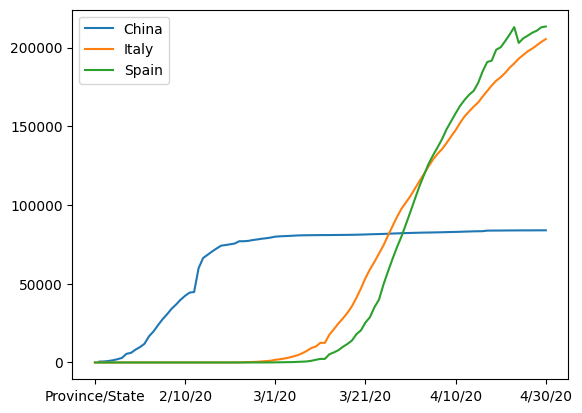

In [26]:
corona_dataset_aggregated.loc['China'].plot()
corona_dataset_aggregated.loc['Italy'].plot()
corona_dataset_aggregated.loc['Spain'].plot()
plt.legend()

<Axes: >

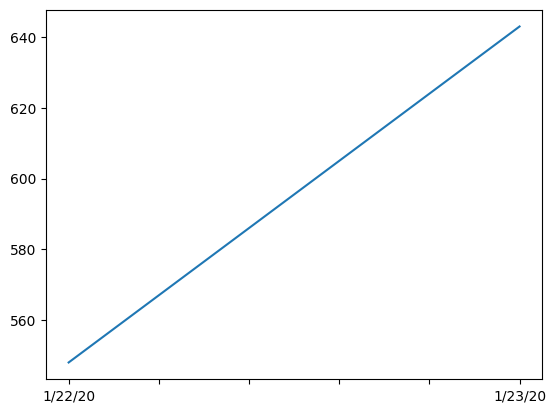

In [27]:
#Spread of the virus in China for the first 3 dates only
corona_dataset_aggregated.loc['China'][:3].plot()

In the 1st 24 hrs, an increase in case (550 to 650) by 100

In the 2nd 24 hrs, an increase (650 to 900) by 250

We want to find a measure for new cases, so either say average or maximum number of new cases.

caculating the first derivative of the curve

<Axes: >

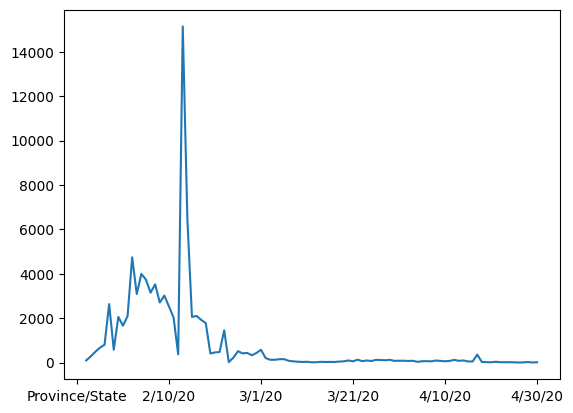

In [28]:
corona_dataset_aggregated.loc["China"].diff().plot()

This plot shows us the change in infection rate day by day and what we are looking for is the maximum number.

find maxmimum infection rate for China

In [ ]:
corona_dataset_aggregated.loc["China"].diff().max()
#In only 24 hrs, the difference was 15136

15136.0

In [29]:
corona_dataset_aggregated.loc["Italy"].diff().max()
#In only 24 hrs, the difference was 6557

6557.0

In [30]:
corona_dataset_aggregated.loc["Spain"].diff().max()
#In only 24 hrs, the difference was 9630

9630.0

Find maximum infection rate for all of the countries.

In [31]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for c in countries :
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
max_infection_rates

[232.0,
 34.0,
 199.0,
 43.0,
 5.0,
 6.0,
 291.0,
 134.0,
 497.0,
 1321.0,
 105.0,
 7.0,
 301.0,
 641.0,
 12.0,
 1485.0,
 2454.0,
 4.0,
 19.0,
 1.0,
 104.0,
 92.0,
 7.0,
 7502.0,
 26.0,
 137.0,
 41.0,
 21.0,
 6.0,
 45.0,
 31.0,
 203.0,
 2778.0,
 31.0,
 21.0,
 1138.0,
 15136.0,
 353.0,
 1.0,
 57.0,
 81.0,
 37.0,
 113.0,
 96.0,
 63.0,
 58.0,
 381.0,
 391.0,
 99.0,
 156.0,
 5.0,
 371.0,
 11536.0,
 269.0,
 32.0,
 130.0,
 7.0,
 134.0,
 20.0,
 9.0,
 5.0,
 267.0,
 26849.0,
 38.0,
 5.0,
 42.0,
 6933.0,
 403.0,
 156.0,
 6.0,
 68.0,
 167.0,
 132.0,
 12.0,
 10.0,
 3.0,
 72.0,
 210.0,
 99.0,
 1893.0,
 436.0,
 3186.0,
 91.0,
 1515.0,
 1131.0,
 6557.0,
 52.0,
 1161.0,
 40.0,
 264.0,
 29.0,
 851.0,
 289.0,
 300.0,
 69.0,
 3.0,
 48.0,
 61.0,
 17.0,
 13.0,
 21.0,
 90.0,
 234.0,
 7.0,
 14.0,
 10.0,
 235.0,
 190.0,
 58.0,
 52.0,
 2.0,
 41.0,
 1425.0,
 222.0,
 12.0,
 13.0,
 30.0,
 281.0,
 19.0,
 3.0,
 14.0,
 1346.0,
 89.0,
 2.0,
 69.0,
 208.0,
 107.0,
 386.0,
 144.0,
 1292.0,
 357.0,
 5.0,
 27.0,
 3683.0,

In [32]:
corona_dataset_aggregated["max_infection_rates"] = max_infection_rates

In [33]:
corona_dataset_aggregated.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0.0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0.0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0.0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0.0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


create a new dataframe with only needed column

In [34]:
corona_data = pd.DataFrame(corona_dataset_aggregated["max_infection_rates"])

In [35]:
corona_data.head()

,max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [36]:
happiness_report_csv = pd.read_csv("/content/worldwide_happiness_report.csv")

In [37]:
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [38]:
useless_cols = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]

In [39]:
happiness_report_csv.drop(useless_cols, axis=1, inplace=True)
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [40]:
happiness_report_csv.set_index("Country or region", inplace=True)

In [41]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


#### Corona Dataset :

In [42]:
corona_data.head()

,max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [43]:
corona_data.shape    #Tuple with 187 countries

(187, 1)

#### wolrd happiness report Dataset :

In [44]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [45]:
happiness_report_csv.shape    #156 countries, less than corona data

(156, 4)

In [46]:
#Inner join
data = corona_data.join(happiness_report_csv,
                how = "inner"    #method/type of join
                )
data.head()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


correlation matrix

In [47]:
data.corr()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rates,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


There is +ve correlation between max_infection-rate and all other features

**Visualization of the results**


In [50]:
data.head()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


Plotting GDP vs maximum Infection rate

<Axes: xlabel='GDP per capita', ylabel='max_infection_rates'>

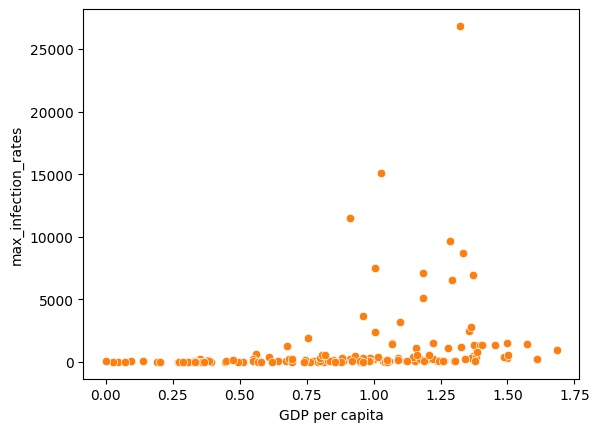

In [53]:

sns.scatterplot(x=x, y=y)

sns.scatterplot(data=data, x="GDP per capita", y="max_infection_rates")

<Axes: xlabel='GDP per capita', ylabel='max_infection_rates'>

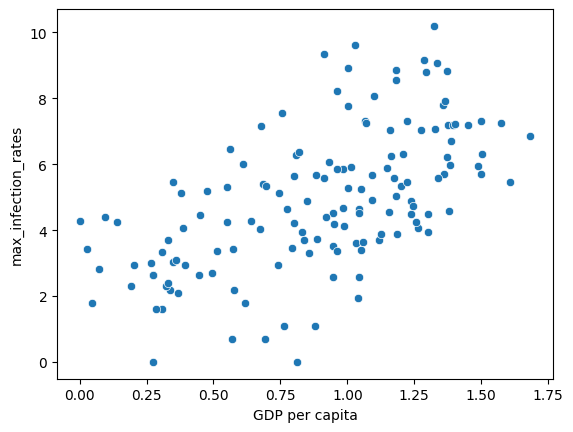

In [58]:
x = data["GDP per capita"]
y = data["max_infection_rates"]
sns.scatterplot(x=x, y=np.log(y))



<Axes: xlabel='GDP per capita', ylabel='max_infection_rates'>

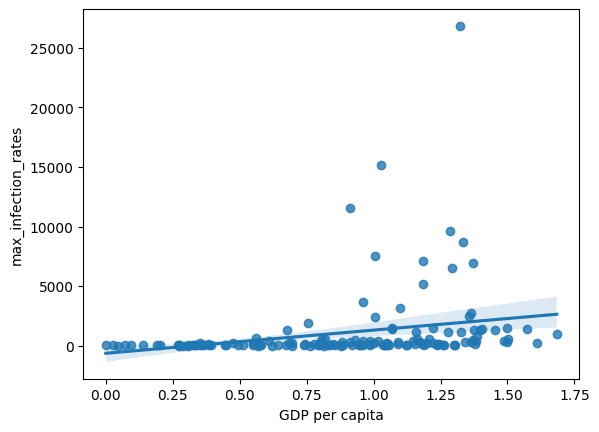

In [59]:
sns.regplot(x="GDP per capita", y="max_infection_rates", data=data)

Plotting Social support vs maximum Infection rate

<Axes: xlabel='Social support', ylabel='max_infection_rates'>

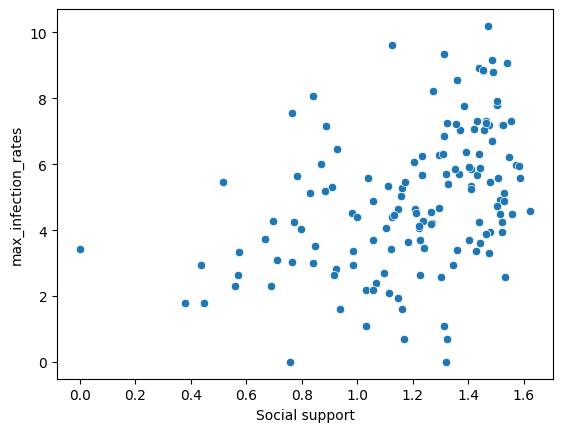

In [61]:
sns.scatterplot(x=x, y=np.log(y))

<Axes: xlabel='Social support', ylabel='max_infection_rates'>

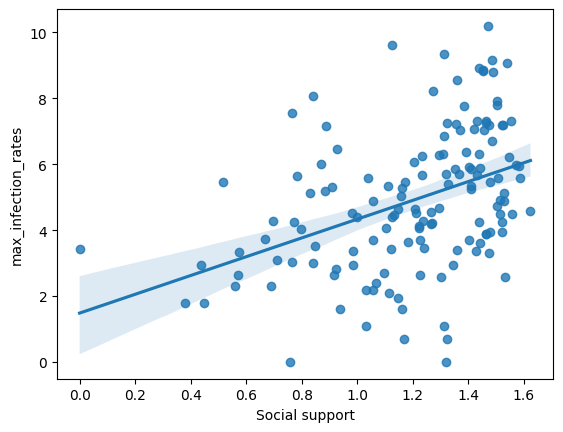

In [63]:
x = data["Social support"]
y = data["max_infection_rates"]

sns.regplot(x=x, y=np.log(y))

<Axes: xlabel='Healthy life expectancy', ylabel='max_infection_rates'>

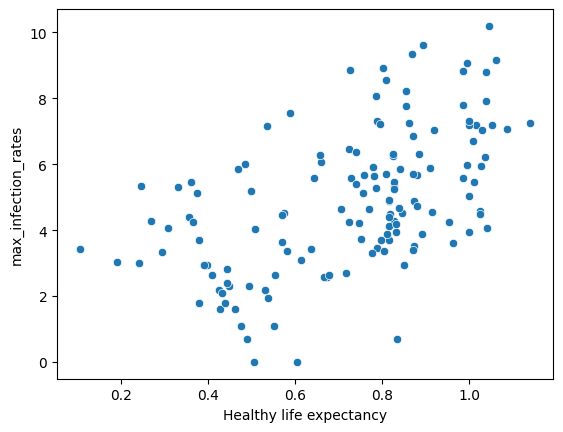

In [66]:
x = data["Healthy life expectancy"]
y = data["max_infection_rates"]

sns.scatterplot(x=x, y=np.log(y))

### Task 5.4: Plotting Freedom to make life choices vs maximum Infection rate

<Axes: xlabel='Freedom to make life choices', ylabel='max_infection_rates'>

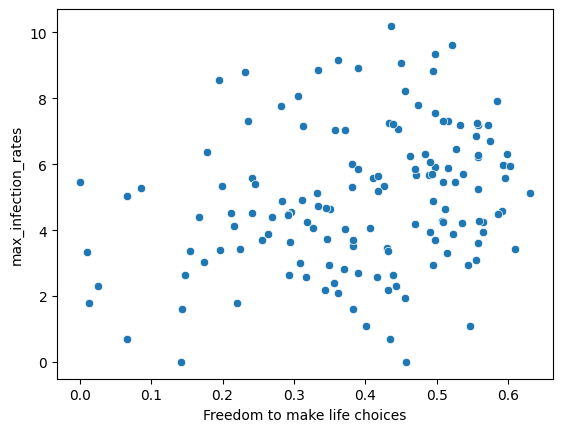

In [69]:
x = data["Freedom to make life choices"]
y = data["max_infection_rates"]

sns.scatterplot(x=x,y=np.log(y))

<Axes: xlabel='Freedom to make life choices', ylabel='max_infection_rates'>

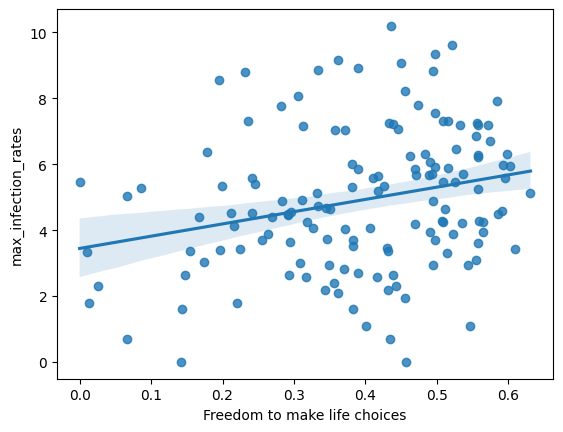

In [70]:
x = data["Freedom to make life choices"]
y = data["max_infection_rates"]

sns.regplot(x=x,y=np.log(y))